In [216]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [217]:
header=["Class-Name","handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution",
        "physician-fee-freeze","el-salvador-aid", "religious-groups-in-schools","anti-satellite-test-ban",
        "aid-to-nicaraguan-contras","mx-missile","immigration","synfuels-corporation-cutback","education-spending",
        "superfund-right-to-sue","crime","duty-free-exports", "export-administration-act-south-africa"]

votes = pd.read_csv("house-votes-84.data", names=header)

votes.head()

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [233]:
for name in votes:
    votes[name] = votes[name].replace('?', np.nan)
    votes[name] = votes[name].replace('n', 0)
    votes[name] = votes[name].replace('y', 1)
    votes[name] = votes[name].replace('republican', 1)
    votes[name] = votes[name].replace('democrat', 0)
    votes = votes.dropna(axis=0, subset=[name])
votes.head()

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [291]:
X = votes.values[:,1:]
y = votes.values[:,0]

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =train_test_split( X, y, test_size = 0.2, random_state = 100) 

# Le modele avec la regression logistique
model = LogisticRegression()

# Entraînement du modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
#accuracy = accuracy_score(Y.flatten(),predicted_classes)
print("Train Accuracy is ", accuracy_score(predicted_classes,y_test)*100)

Train Accuracy is  93.61702127659575


In [221]:
#no of features
nof_list=np.arange(1,16)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.849494


In [222]:
model=LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)

print(rfe.support_)
print(rfe.ranking_)

features_names= []
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        features_names.append(header[i])
print(features_names)

[False False  True  True False False False False  True False  True False
 False False False False]
[13  9  1  1  4  6 11  8  1  3  1  7 10  2  5 12]
['water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'aid-to-nicaraguan-contras', 'immigration']


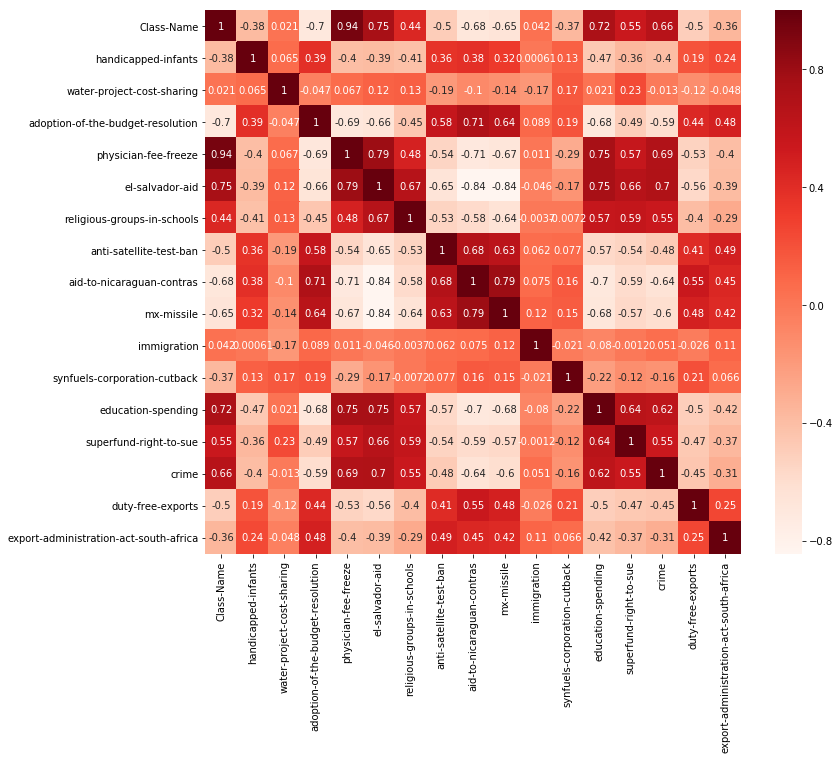

In [223]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = votes.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [290]:
correlated_features = set()  
correlation_matrix = votes.corr()  
for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


new_feat=[]
for name in header :
    if name not in correlated_features :
        new_feat.append(name)
        
df_none_cor=votes[new_feat]

X1 = df_none_cor.values[:,1:]
y1 = df_none_cor.values[:,0]

#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.1)


# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train,y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print('The accuracy of Correlation method is Method is: {}'.format(accuracy))


The accuracy of Correlation method is Method is: 0.8333333333333334


In [227]:
import io
import time
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


df1 = votes.drop(["Class-Name"], axis=1)
df1_names=df1 .columns

#Fischer Score: Chi Square
#In this notebook, we'll compute the chi-squared stats between each non negative feature and the target class(Class Name).
#This score should be used to evaluate categorical variables in a classification task
# Calcualte the Fisher Score (chi2) between each feature and target

fisher_score = chi2(X_train, y_train)

#Two arrays are returned: F scores and P value. More the P value, more difference between the distributions.
p_values = pd.Series(fisher_score[1])
p_values.index = df1_names
p_values.sort_values(ascending=False)
p_values

handicapped-infants                       4.678143e-06
water-project-cost-sharing                7.891517e-01
adoption-of-the-budget-resolution         4.563911e-12
physician-fee-freeze                      6.790686e-22
el-salvador-aid                           4.112652e-12
religious-groups-in-schools               4.332616e-04
anti-satellite-test-ban                   1.115430e-06
aid-to-nicaraguan-contras                 2.508213e-11
mx-missile                                3.585116e-11
immigration                               5.482510e-01
synfuels-corporation-cutback              2.243919e-05
education-spending                        2.427288e-13
superfund-right-to-sue                    2.315328e-07
crime                                     2.172967e-08
duty-free-exports                         1.655084e-08
export-administration-act-south-africa    4.135322e-02
dtype: float64

In [228]:
fisher_score

(array([2.096e+01, 7.151e-02, 4.787e+01, 9.248e+01, 4.807e+01, 1.238e+01,
        2.372e+01, 4.453e+01, 4.383e+01, 3.605e-01, 1.797e+01, 5.362e+01,
        2.675e+01, 3.133e+01, 3.186e+01, 4.161e+00]),
 array([4.678e-06, 7.892e-01, 4.564e-12, 6.791e-22, 4.113e-12, 4.333e-04,
        1.115e-06, 2.508e-11, 3.585e-11, 5.483e-01, 2.244e-05, 2.427e-13,
        2.315e-07, 2.173e-08, 1.655e-08, 4.135e-02]))

In [280]:
#Smaller the p_value, more significant the feature is to predict the target value,so we choose features that maximize the lower bound of traditional Fisher score
#Deviser les nouveaux X et Y

df2 = votes[["Class-Name",'religious-groups-in-schools','el-salvador-aid','anti-satellite-test-ban','education-spending']]

X = df2.values[:,1:]
y = df2.values[:,0]

#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)


# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train,y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print('The accuracy of Fisher Method is: {}'.format(accuracy))


The accuracy of Fisher Method is: 0.9583333333333334


Selected top features: [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]]


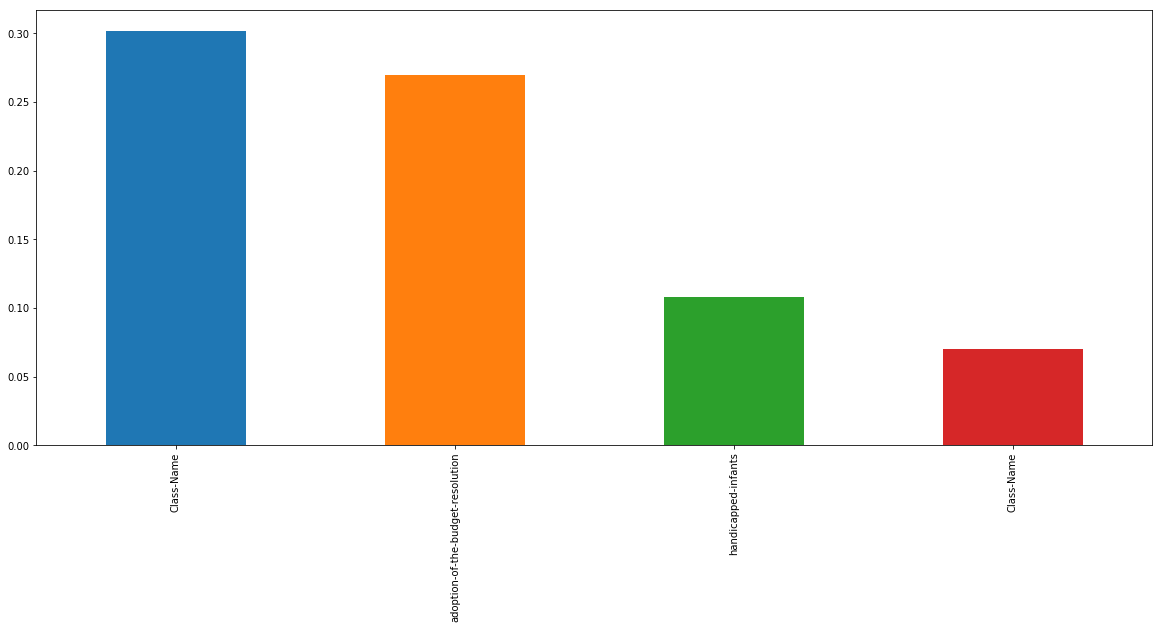

In [277]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

# Select K best features
k_best_features = SelectKBest(mutual_info_classif,k=3).fit(X_train, y_train)
cols = k_best_features.get_support(indices=True)



print('Selected top features: {}'.format(X_train[k_best_features.get_support()-1]))

new_features=[]
new_features.append("Class-Name")
for i in cols:
    new_features.append(header[i])
    
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = new_features
mi_series.sort_values(ascending=False)
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))


In [279]:
#Deviser les nouveaux X et Y

df3 = votes[['Class-Name','adoption-of-the-budget-resolution',"water-project-cost-sharing"]]

X3 = df3.values[:,1:]
y3 = df3.values[:,0]


#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.1)



# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print('The accuracy of SelectKBest: {}'.format(accuracy))

The accuracy of SelectKBest: 0.9166666666666666
